# Lecture 3 - Code Implementation of Polynomial Regression, Model Selection & Regularization

Last class we introduced **linear regression** with polynomial features (sometimes referred to **polynomial regression**) and discussed the different system components.

Let $\{(x_i,t_i)\}_{i=1}^N$ be a set of training data samples, where each sample $x_i$ and target $t_i$ are continuous-valued, i.e. $x_i, t_i \in\mathbb{R}$.

1. **Feature Space:** we can create a *deterministic* set of features with, for example, a polynomial basis function:

\begin{align*}
\phi: \mathbb{R} &\longrightarrow \mathbb{R}^{M+1}\\
x &\longmapsto \begin{bmatrix}\phi_0(x) & \phi_1(x) & \phi_2(x) & \dots &\phi_M(x) \end{bmatrix}^T\\
x &\longmapsto \begin{bmatrix}x^0 &x^1&x^2&\dots&x^M\end{bmatrix}^T
\end{align*}

That is, for every ample $x_i$ in training, we map to the polynomial basis feature space: $\phi(x_i) = \left[1, x_i, x_i^2, \dots, x_i^M\right]^T, \forall i$.

Let $\mathbf{x}$ be the vector containing all training samples, i.e. $\mathbf{x}=\begin{bmatrix}x_1 & x_2 &  x_2 & \dots & x_N\end{bmatrix}^T$. We can build a **feature matrix** (or **data matrix**) of size $N\times (M+1)$ that contains this polynomial feature representation:

\begin{align*}
\mathbf{X} = \begin{bmatrix}\phi_0(\mathbf{x}) & \phi_1(\mathbf{x}) & \phi_2(\mathbf{x}) & \dots & \phi_M(\mathbf{x})\end{bmatrix} = \begin{bmatrix} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_N)^T \end{bmatrix} = \begin{bmatrix}1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^M\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^M\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^M
\end{bmatrix}
\end{align*}

2. **Mapper**: a linear combination of features weighted by a set of parameters $\mathbf{w}=\left[w_0, w_1, w_2,\dots, w_{M-1}\right]^T$, taking the form

$$y = f(\phi(x),\mathbf{w}) = \sum_{j=0}^{M} w_j\phi_j(x)$$

or, in matrix form,

$$y = f(\phi(x),\mathbf{w}) = \mathbf{X}\mathbf{w}$$

3. **Objective Function**: function that assesses the *quality* of the output of the model, for example, an error-based function such as L2-norm of the error or the mean-squared error (MSE) function:

$$J(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \left(t_n - f(\phi(x_n),\mathbf{w})\right)^2 = \frac{1}{2}\left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2$$

4. **Learning Algorithm**: an algorithm that solves or searches for the *optimal* values of the parameters $\mathbf{w}$ that optimize the objective function. It solves the following optimization problem:

$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$

Because the selected model is linear on the parameters and our objective function is convex, we can solve for a solution analytical without having to resort to search algorithms such as the gradient descent.

We computed the solution for the parameters $\mathbf{w}$ to be:

$$\mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}$$

We can use multivariate calculus to take this derivative and solve for $\mathbf{w}$ (see Lecture 2 notes for this approach), or we can refer to our knowledge of statistics. Recall that we want the output $\mathbf{y}$ to be as close as possible to the target response $\mathbf{t}$, therefore, we are solving for $\mathbf{w}$ using the following equation:

$$\mathbf{t} = \mathbf{X}\mathbf{w}$$

But, note that $\mathbf{X}$ is a tall matrix (usually - and ideally - $N>>M$), so we **cannot** just that the left-inverse of $\mathbf{X}$. This is an overdetermined system, which in most cases does not have a solution. 

Thus, we can find a solution using the **least squares** approximation, which provides us with a closed-form solution for $\mathbf{w}$:

$$\mathbf{w} = \mathbf{X}^{\dagger}\mathbf{t}$$

where $\mathbf{X}^{\dagger}$ is the **pseudo-inverse** of the tall matrix $\mathbf{X}$ and can be computed as

$$\mathbf{X}^{\dagger} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T$$

Note that since our objective function is the least squares objective function, we arrive at the **same solution** for $\mathbf{w}$:

$$\mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}$$

---
**This completes the training stage.** For any given input data, we can compute its polynomial representation and find a solution for $\mathbf{w}$:

$$\mathbf{w}^* = \mathbf{X}_{\text{train}} ^{\dagger}\mathbf{t}_{\text{train}}$$

and 

$$y_{\text{train}} = \mathbf{X}_{\text{train}}\mathbf{w}^*$$ 

In the **testing stage**, for any point we first component its polynomial representation (feature matrix), and then use the trained model (essentially the solution we found for the parameters $\mathbf{w}$) to estimate a prediction for the test samples:

$$y_{\text{test}} = \mathbf{X}_{\text{test}}\mathbf{w}^*$$ 

---

## Basis Functions

In step 1, feature extraction, we can use other basis functions. Some examples include:

* Polynomials Basis functions: $\phi_j(x) = x^j$

* Gaussian Basis functions: $\phi_j(x) = \exp\left\{-\frac{(x-\mu_j)^2)}{2s^2}\right\}$

* Sigmoidal basis function: $\phi_j(x) = \sigma\left(\frac{x-\mu_j}{s}\right)$, where $\sigma(a)$ is the logistic sigmoid function defined by $\sigma(a)=\frac{1}{1+\exp(-a)}$

* Fourier Basis functions, which leads to an expansion in sinusoidal functions. Each basis function represents a specific frequency and has infinite spatial extent

* Wavelets Basis Functions, representing both space and frequency

Readings: [section 3.1 of the Bishop textbook](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) and [Section 5.6 - Linear Regression from the "Python Data Science Handbook" textbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Gaussian-Basis).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
x=np.linspace(-1,1,1000)

fig = plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
polynomials=np.array([x**i for i in range(1,10)]).T # Polynomial Basis Functions
plt.plot(x, polynomials); plt.title('Polynomial Basis Functions')

plt.subplot(1,3,2)
sig=0.3 #fixed standard deviation for each Gaussian basis function
polynomials=np.array([np.exp(-(x-i)**2/(2*sig**2)) for i in np.linspace(-1,1,10)]).T # Gaussian Basis Functions
plt.plot(x, polynomials); plt.title('Gaussian Basis Functions')

plt.subplot(1,3,3)
sig=0.05 #fixed standard deviation for each sigmoidal basis function
polynomials=np.array([1/(1+np.exp(-(x-i)/sig)) for i in np.linspace(-1,1,10)]).T # Sigmoidal Basis Functions
plt.plot(x, polynomials); plt.title('Sigmoidal Basis Functions')

legend_labels=['$\phi_0(x)$','$\phi_1(x)$','$\phi_2(x)$','$\phi_3(x)$','$\phi_4(x)$','$\phi_5(x)$',
           '$\phi_6(x)$','$\phi_7(x)$','$\phi_8(x)$','$\phi_9(x)$','$\phi_{10}(x)$']
fig.legend(legend_labels, loc = (0.1, 0), ncol=11, fontsize=13);

---

# Code Implementation

**What can you control?** 

<!-- * Model order -->
<!-- * Feature vectors or *basis functions* -->

How would you implement linear regression using polynomial features?
 * Let's see with an example.

## Example: Suppose Input Data is sampled from a (noisy) sine curve 

Suppose our data comes from a noisy sinusoidal: $t = \sin(2\pi x) + \epsilon$ where $\epsilon$ is a (univariate) Gaussian zero-mean random noise. 

* The univariate Gaussian Distribution is defined as:
\begin{align*}
\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{1/2}} \exp\left\{ - \frac{(x - \mu)^2}{2\sigma^2}\right\}
\end{align*}

where $\mu$ is the mean and $\sigma^2$ is the variance. 

* If the noise is zero-mean Gaussian distributed, it is like we are saying there is a Gaussian around the true curve: 

\begin{align*}
t = y + \epsilon
\end{align*}

Let's generate data from the *true* underlying function (which, in practice, we would not know).

In [2]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

In [3]:
# Generate input samples and desired values
N_train = 50 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.1 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

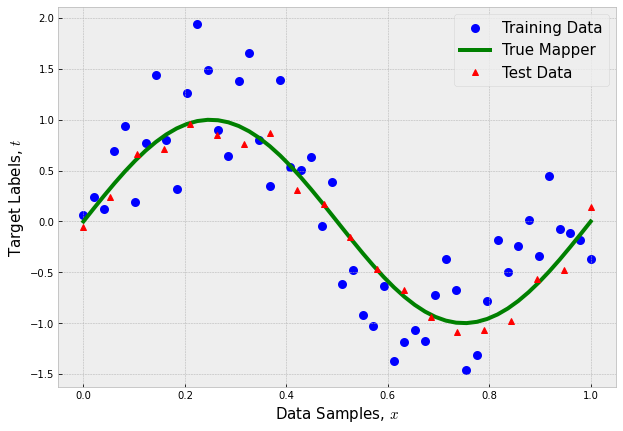

In [4]:
plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

Now let's fit the data using the *polynomial regression* model:

In [5]:
x_train.shape

(50,)

In [7]:
x_train[1]

0.02040816326530612

In [8]:
[x_train[1]**i for i in range(4)]

# x ----> [x^0, x^1, x^2, x^3]

[1.0, 0.02040816326530612, 0.00041649312786339016, 8.499859752314085e-06]

In [9]:
np.array([x_train[1]**i for i in range(4)])

array([1.00000000e+00, 2.04081633e-02, 4.16493128e-04, 8.49985975e-06])

In [11]:
np.array([x_train**i for i in range(4)]).shape

(4, 50)

In [12]:
X = np.array([x_train**i for i in range(4)]).T

X.shape

(50, 4)

In [14]:
def PolynomialRegression(x,t,M):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    
    # Compute feature matrix X with polynomial features
    X = np.array([x_train**i for i in range(M+1)]).T
    
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X)@X.T@t
    
    # Compute model prediction
    y = X@w # output should be a Nx1 vector
    
    return w, y

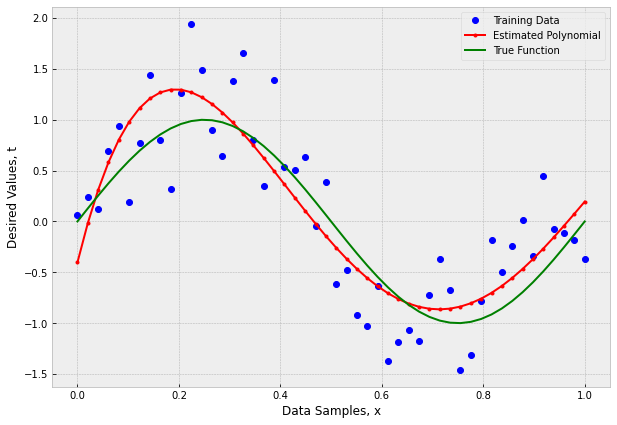

In [26]:
# Model Order
M = 4 # w should be a 5x1 when M=4

# Find the parameters that fit the noisy sinusoidal
w, y_train = PolynomialRegression(x_train, t_train, M) 

plt.figure(figsize=(10,7))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

Let's see how well does this trained model **generalize** to the test data, to which we do not have labels.

In the test data:
* Apply the same feature extraction as in training: $\mathbf{X}_{test} = \Phi(\mathbf{x}_{test})$, where $\mathbf{X}_{test}$ is a $K\times (M+1)$ data matrix
* Predict the output using $\mathbf{w}^*$: $\mathbf{y}_{test} = \Phi(\mathbf{x}_{test})\mathbf{w}^*$

In [27]:
# Apply the parameters following the equation y = X*w or y = Phi * w in the Polynomial Regression case

# Compute test feature matrix
X_test = np.array([x_test**i for i in range(M+1)]).T

# Prediction for test samples using the trained model
y_test = X_test@w

In [28]:
def PolynomialRegression_test(x, M, w):
    
    X = np.array([x**i for i in range(M+1)]).T
    
    y = X@w
    
    return y

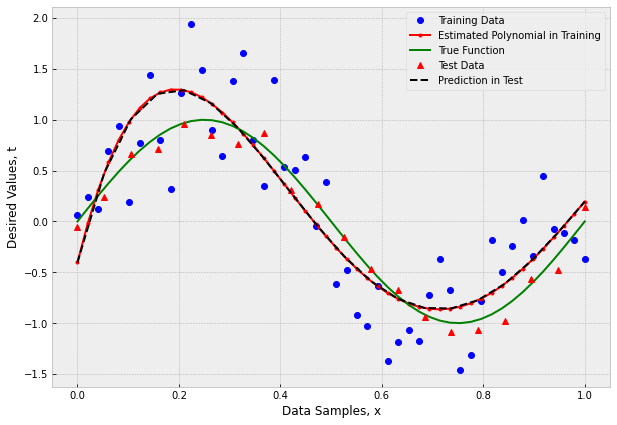

In [29]:
y_test = PolynomialRegression_test(x_test, M, w)

plt.figure(figsize=(10,7))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Estimated Polynomial in Training')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.plot(x_test,t_test,'r^', label = 'Test Data')
plt.plot(x_test,y_test,'--k', label = 'Prediction in Test')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

* How do the weights look like?

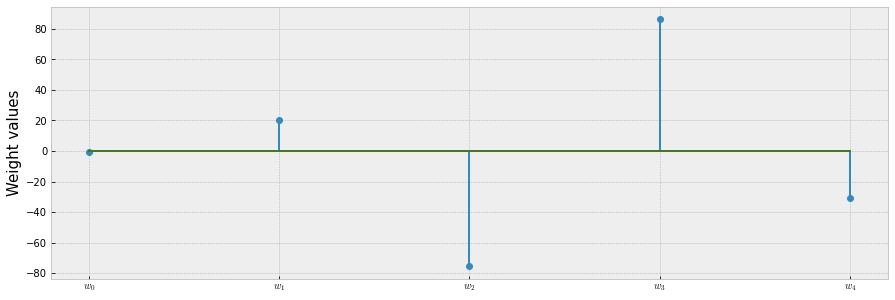

In [30]:
plt.figure(figsize=(15,5))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0);

* What happens when the test points fall outside the range of what the model has *learned*?

In [ ]:
M = 4
w, y_train = PolynomialRegression(x_train,t_train,M) 

x_test2, t_test2 = NoisySinusoidalData(N_test, 0, 1.5, sigma_test)

plt.figure(figsize=(10,7))
plt.plot(x_train, t_train, 'bo', label = 'Training Data')
plt.plot(x_true, t_true, '-g', label = 'True Sinusoidal')
plt.plot(x_test2, t_test2, 'r^', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

In [ ]:
%matplotlib notebook

y_test2 = PolynomialRegression_test(x_test2, M, w)  # prediction for test samples using the trained model

plt.figure(figsize=(10,7))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'-g', label = 'True Function')
plt.plot(x_test2,t_test2,'r^', label = 'Test Data')
plt.plot(x_test2,y_test2,'--k', label = 'Test Predictions')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

---

# How to avoid overfitting?

<div class="alert alert-info">
    <b>Overfitting</b> 

In model fitting, a model is said to have **overfit** to the training data, if it is *not* able to *generalize* to new and unknown data. We can observe this effect as the training error is small but the error in the test data is very large.

In other words, overfitting means that the *true* underlying model of the data is not estimated/learned properly, instead the model returned a poor representation that **memorized** the training samples **and** any meaningless noise in the data.
</div>

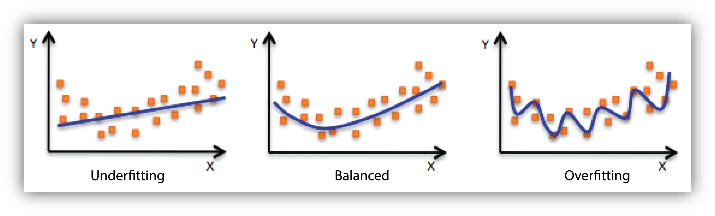

In [31]:
from IPython.display import Image
Image('figures/fits.png',width=700)

<div class="alert alert-info">
    <b>Underfitting</b> 

In model fitting, a model is said to have **underfit** if the error in both in training and test data sets are still decreasing. 

An underfitted model is not complex enough to model all the characteristics in the data.
</div>

As we saw before, as the polynomial model order increases, the weight values become very large! This is a good indication that we may be *memorizing* the training data.

* As $M$ increases, there are more parameters (more elements in the vector $\mathbf{w}$) to learn and, so, the model becomes more complex.

* The model order $M$ in polynomial regression regulates the model *complexity*. The large *M* is, the model complex the model is.
    * In a Polynomial regresssion it also controls the richness of the feature space.
* **Occam's Razor** states that the simplest model that works for our data is usually the most appropriate and sufficient. Model simplicity can mean different things, but we can consider model order. 

As a model that is *complex*, it is more likely to *overfit* or *overtrain*.
* This essentially means it may "memorize" the input training data,
* Including all of the training data's noise!

## Adding a Weight Penalty or *Regularizer* to the Objective Function

Suppose you have $N$ data points and you are trying to estimate $M$ coefficients. In other words, you are solving a set of $N$ equations with $M$ variables. For the least squares ojective function, we computed the solution for this linear system to be:

$$\mathbf{w} = \mathbf{X}^{\dagger}\mathbf{t} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t}$$

**What happens when we have more unknowns than known variables, i.e., $M > N$? (This means the feature matrix $X$ will be a wide matrix.)** 

In other words, what happens when the data matrix, $\mathbf{X}^T\mathbf{X}$, is **not** full rank?

* Review *span* and *rank*: ["Inverse matrices, column space and null space", YouTube 3Blue1Brown video](https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7)

In practice, it is quite often to obtain a **singular matrix** error. When this occurs, we know that the matrix $\mathbf{X}^T\mathbf{X}$ is **not invertible**.

<div class="alert alert-info">
    <b>Regularization</b> 

Regularization constrains (or regularizes) the parameter coefficients such that they cannot take a large value. Regularization of the model parameters discourages learning a more complex, as to avoid the risk of overfitting.
</div>

### Ridge Regularizer

The Ridge regularizer, also known as the L2-Norm regularizer or weight decay, adds a term with the squared sum of the weights scaled by the hyperparameter $\lambda$. 

\begin{align*}
R^{(L2)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M w_i^2 \\
&= \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the objective function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

* The hyperparameter $\lambda$ controls how much you want to regularize the model. If $\lambda$ is 0 then the learning algorithm will just minimize the error term in the cost function. If $\lambda$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

### Lasso Regularizer

The Lasso regularizer, also known as the L1-norm regularizer, it adds a term with the L1-norm of the weight vector $\mathbf{w}$ scaled by the hyperparameter $\lambda$. $\lambda$ here has the same tradeoff responsibility.

\begin{align*}
R^{(L1)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M |w_i| \\
&= \lambda \Vert\mathbf{w}\Vert_1
\end{align*}

* An important characteristic of the Lasso regularizer is that it tends to eliminate the weights of the least important features by setting them to zero. This is known as **sparsity**.

### Elastic Net Regularizer

Elastic Net is a middle ground between Ridge and Lasso. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio with the hyperparameter $\beta$.

\begin{align*}
R^{(L12)}_{\mathbf{w}} &= \beta\lambda \sum_{i=0}^M |w_i| + (1-\beta) \lambda \sum_{i=0}^M w_i^2 \\
&= \beta R^{(L1)}_{\mathbf{w}} + (1-\beta) R^{(L2)}_{\mathbf{w}}
\end{align*}

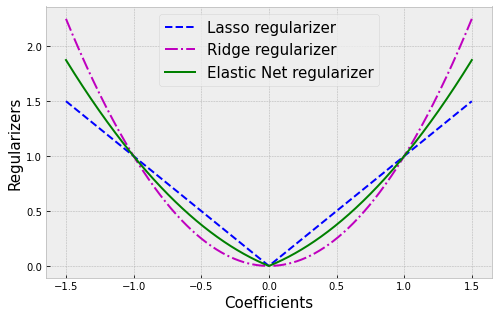

In [32]:
def Regularizers(w,beta=0.5):
    L1 = np.abs(w)
    L2 = w**2
    Elastic = beta*np.abs(w) + (1-beta)*w**2
    return L1, L2, Elastic

x = np.linspace(-1.5,1.5,1000)
L1,L2,Elastic=Regularizers(x)

plt.figure(figsize=(8,5))
plt.plot(x,L1, 'b--', label = 'Lasso regularizer')
plt.plot(x,L2, 'm-.', label = 'Ridge regularizer')
plt.plot(x,Elastic, 'g-', label = 'Elastic Net regularizer')
plt.xlabel('Coefficients',size=15)
plt.ylabel('Regularizers',size=15); plt.legend(fontsize=15);

#### Observations

* Ridge regularizer:
    * forces parameter values to be small but not equal to zero
    * is highly affected by outliers

* Lasso regularizer:
    * promotes sparsity, i.e. forces some parameter values to be exactly equal to zero
    * it is not as affected by outliers
    
* Elastic Net regularizer:
    * requires fine-tuning of an extra hyperparameter

#### Examples

* Consider $\mathbf{w}=[0.5,0.5,1]$. We find that the rigde regularizer is $R^{(L2)}_{\mathbf{w}} = 0.5^2+0.5^2+1^2 = 1.5$, whereas the lasso regularizer gives us $R^{(L1)}_{\mathbf{w}}=0.5+0.5+1=2$. Thus, for this set of coefficients, the lasso regularizer will apply a stronger penalty (larger value).

* Consider $\mathbf{w}=[0,0,2]$. We find that the rigde regularizer is $R^{(L2)}_{\mathbf{w}} = 0^2+0^2+2^2 = 4$, whereas the lasso regularizer gives us $R^{(L1)}_{\mathbf{w}}=0+0+2=2$. Thus, for this set of coefficients, the ridge regularizer will apply a stronger penalty (larger value).
    
#### Which one to choose?

Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

<div class="alert alert-info">
    <b>Ridge Regression</b> 

Let $\{(x_i,t_i)\}_{i=1}^N$ be the set of training data, where $x_i$ are the training samples and $t_i$ their associated target/desired value. Consider the linear regression model: $\mathbf{y} = \mathbf{X}\mathbf{w}$, where $\mathbf{X}$ is the feature matrix of size $N\times(M+1)$.

The Ridge Regression objective function penalizes the weights with the L2-norm:

\begin{align*}
J(\mathbf{w}) &= \Vert\mathbf{t}-\mathbf{X}\mathbf{w}\Vert_2^2 + \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

Our goal is to find $\mathbf{w}$ that minimizes the objective function $J(\mathbf{w})$, that is:
    
\begin{align*}
\arg_{\mathbf{w}}\min J(\mathbf{w})
\end{align*}

</div>

Let's expand the equation for $J(\mathbf{w})$:

\begin{align*}
J(\mathbf{w}) &= \Vert\mathbf{t}-\mathbf{X}\mathbf{w}\Vert_2^2 + \lambda \Vert\mathbf{w}\Vert_2^2\\
&= (\mathbf{t}-\mathbf{X}\mathbf{w})^T(\mathbf{t}-\mathbf{X}\mathbf{w}) + \lambda\mathbf{w}^T\mathbf{w}\\
&= \mathbf{t}^T\mathbf{t} -\mathbf{t}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{t}+\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} + \lambda\mathbf{w}^T\mathbf{w}
\end{align*}
    
A necessary condition for $\mathbf{w}$ to be a minima of $J(\mathbf{w})$ is $\frac{dJ}{d\mathbf{w}}=0$:

\begin{align*}
\frac{d J}{d \mathbf{w}} = -2\mathbf{t}^T\mathbf{X} + 2\mathbf{w}^T\mathbf{X}^T\mathbf{X} + \lambda 2\mathbf{w}^T\mathbf{I}
\end{align*}

Setting it to zero, applyting transpose on both sides, and solving for $\mathbf{w}$:

\begin{align*}
-\mathbf{X}^T\mathbf{t} + \mathbf{X}^T\mathbf{X}\mathbf{w} + \lambda \mathbf{I}\mathbf{w} &= 0 \\
(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})\mathbf{w} &= \mathbf{X}^T\mathbf{t}\\
\mathbf{w} &= (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T\mathbf{t}
\end{align*}

The optimal solution is in closed-form before we are dealing with a linear model and a quadratic objective function:

$$\mathbf{w} = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

where $\mathbf{I}$ is an identity matrix of size $(M+1)\times (M+1)$. As you can see, we first **diagonally-load** the square matrix $\mathbf{X}^T\mathbf{X}$ before inverting it.

### Observations

* In practice, the square matrix $\mathbf{X}^T\mathbf{X}$ may be **singular**. This will happen when:
    1. There are more parameters than samples
    2. Some of the features are linearly dependent
    
* A singular matrix:
    * is not full rank
    * has at least one eigenvalue equal to 0
    * its determinant is 0
    * One or more columns (or rows) are linearly dependent

* One solution to matrix singularity is to diagonally load it, before inverting. Diagonally loading a singular matrix, will force it to become full rank.

* If $\lambda \rightarrow 0$, then the penalty will be disregarded in the solution for the parameters.

* If $\lambda \rightarrow \infty$, then the penalty term will be very large, therefore the learning algorithm will *try* to minimize it.

**In code, how would you change the function ```PolynomialRegression``` created above to include the regularization term?**

In [33]:
def PolynomialRegression_reg(x,t,M,lam):
    
    # Compute feature matrix X with polynomial features
    X = np.array([x**i for i in range(M+1)]).T
    
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X + lam*np.eye(M+1))@X.T@t
    
    # Compute model prediction
    y = X@w
    
    return w, y

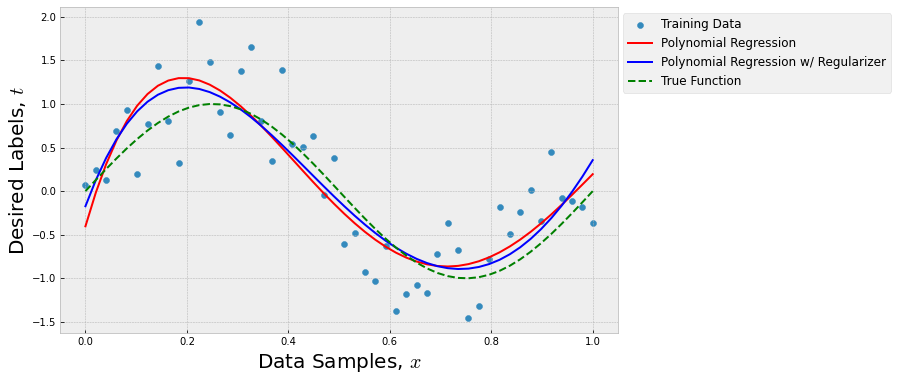

In [40]:
M = 4 
lam = 0.0001

_, y, = PolynomialRegression(x_train,t_train,M) 
_, yreg = PolynomialRegression_reg(x_train,t_train,M,lam) 

fig=plt.figure(figsize=(10,6))
plt.scatter(x_train,t_train, label='Training Data')
plt.plot(x_train,y,'r', label = 'Polynomial Regression')
plt.plot(x_train,yreg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.plot(x_true,t_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

## Fine-tuning the Hyperparameters

The hyperparameters of ridge regression are the model order $M$ and the regularizer coefficient $\lambda$.

How would you choose which value to use? -- Cross-validation.

---

## Ways to Avoid Overfitting

1. Add more data! - when possible

2. Occam's Razor - select a model with lower complexity

3. Regularization - constrains/regularizes the coefficients of the model

4. Cross-validation - technique for utilizing the training data to fine-tune hyperparameter values

---